In [1]:
# Author: Dana Fidler
# Date: May 10, 2018
# Due Date: May 11, 2018
# Assignment: Final Project
# Filename: dfidl356_final_project.ipyb
# Purpose: Analyze Hurricane name data using numpy, 
#          pandas, and matplotlib

# United States Atlantic Hurricane Name and Effects

This is a quick analysis to look at the names of Atlantic hurricanes in the United States and the effects they had. From this analysis I am looking to find some correlation between hurricane names and the destruction, windspeeds, or deaths. There have been previous studies on this topic about how female hurricane names correlate to a deadlier hurricane, but hopefully some conclusion can be drawn from my data analysis. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Some data column names are self explanatory. But for better comprehension I have redefined the names of the data attributes. 

The following dataset is from: https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/hurricNamed.html

The different columns represent the following:
- Name: the name of the hurricane
- Year: the year the hurricane occured
- MaxWindspeed: the maximum windspeed reached during the hurricane, but as quoted from the dataset description, "Prior to 1980, this is estimated from the maximum windspeed associated with the Saffir-Simpson index at landfall. If 2 or more landfalls, the maximum is taken."
- DamagesThatYearMil: These are the cost of property damages (in millions) of United States Dollars (USD). This was calculated using USD from the year that the hurricane occured.
- Deaths: the number of fatalities in the continental United States (direct and indirect)
- Gender: the gender of the hurricane name given
- Damages2014Mil: The cost of property damages (in millions) of 2014 USD.

In [3]:
df = pd.read_csv('hurricNamed.csv')
# Drop Repeatitive columns
df = df.drop(df.columns[[0, 4, 5, 8, 7, 9]], axis=1)
# Rename columns for readability
df.columns = ['Name', 'Year', 'MaxWindspeed', 'DamagesThatYearMil', 'Deaths', 'Gender', 'Damages2014Mil']
# Preview of the dataset
df.head(94)

,Name,Year,MaxWindspeed,DamagesThatYearMil,Deaths,Gender,Damages2014Mil
0,Easy,1950,120,3.3000,2,f,32.419419
1,King,1950,130,28.0000,4,m,275.073859
2,Able,1952,85,2.7500,3,m,24.569434
3,Barbara,1953,85,1.0000,1,f,8.867416
4,Florence,1953,85,0.2000,0,f,1.773483
5,Carol,1954,120,460.2275,60,f,4050.686353
6,Edna,1954,120,40.0000,20,f,352.059480
7,Hazel,1954,145,281.0000,20,f,2473.217844
8,Connie,1955,120,40.0000,0,f,353.373134
9,Diane,1955,85,200.0000,200,f,1766.865672


Below shows the amount of female and male named hurricanes. Clearly, there is 68.1% of female named hurricanes, and only 31.9% male names.

In [4]:
totalGender = df.groupby(['Gender']).count()
totalGender['Name']

Gender
f    64
m    30
Name: Name, dtype: int64

In [5]:
females = totalGender['Name'][0]
males = totalGender['Name'][1]

print('Percentage of hurricanes that are female names', females/(males+females)*100)
print('Percentage of hurricanes that are male names', males/(males+females)*100)

Percentage of hurricanes that are female names 68.08510638297872
Percentage of hurricanes that are male names 31.914893617021278


### Amount of destruction grouped by the gender of the name. 
Below is a table of the total damages separated by gender.

In [6]:
deathsByNameGender = df.groupby(['Gender'])['Deaths', 'DamagesThatYearMil', 'Damages2014Mil'].sum()
deathsByNameGender

,Deaths,DamagesThatYearMil,Damages2014Mil
Gender,,,
f,3725,212598.2475,305461.241515
m,427,101427.2850,148576.774789


#### Below is a bar graph representation of the table that is above. 
The graphs below compare the different types of damages from hurricanes separated by gender of given name. The first graph in relation to death toll, clearly shows a higher amount of deaths from female named hurricanes. 
The second and third graph are similar in that they are both comparing property damage. Yet the second is showing based on the United States Dollar (USD) of the year that the hurricane took place, while the third is comparing a 2014 USD value to give a more comprehensible graph.

Text(0,0.5,'United States Dollar in Millions')

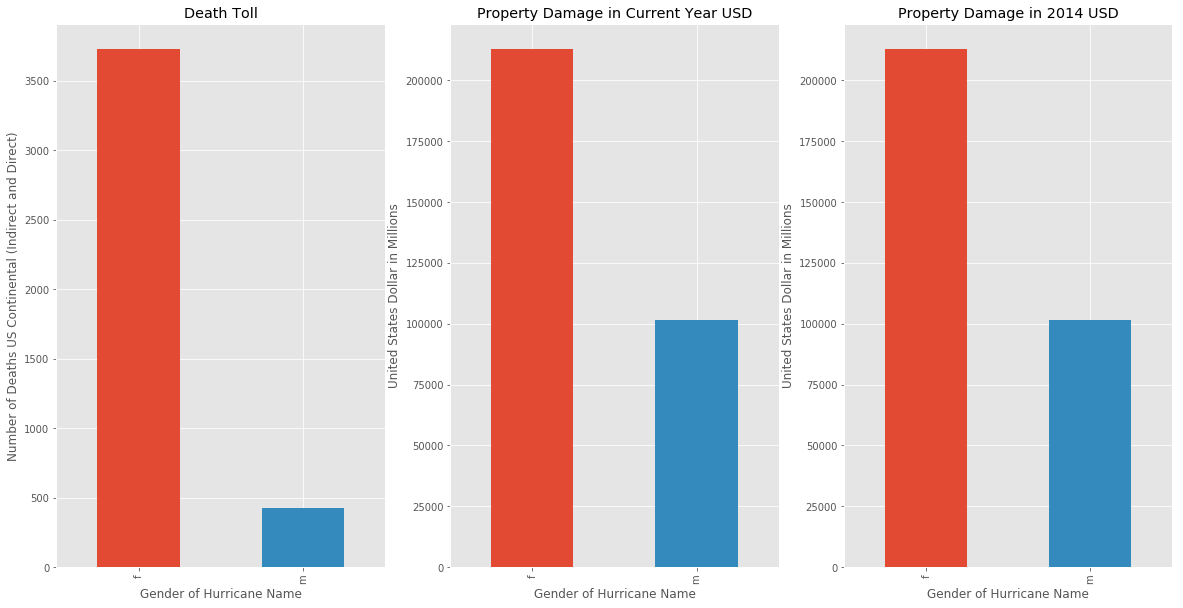

In [7]:
plt.style.use(['ggplot'])
# Plotting grouped by gender and total deaths
deathsByNameGender = df.groupby(['Gender'])['Deaths'].sum()
plt.subplot(1, 3, 1)
deathsByNameGender.plot.bar(figsize=(20,10))
plt.title('Death Toll')
plt.xlabel('Gender of Hurricane Name')
plt.ylabel('Number of Deaths US Continental (Indirect and Direct)')
# Plotting grouped by gender and total damages from United States Dollars (USD) of that current year in millions.
damagesCurrentYear = df.groupby(['Gender'])['DamagesThatYearMil'].sum()
plt.subplot(1, 3, 2)
damagesCurrentYear.plot.bar(figsize=(20,10))
plt.title('Property Damage in Current Year USD')
plt.xlabel('Gender of Hurricane Name')
plt.ylabel('United States Dollar in Millions')
# Plotting grouped by gender and total damages from 2014 USD in millions.
damagesAs2014USD = df.groupby(['Gender'])['Damages2014Mil'].sum()
plt.subplot(1, 3, 3)
damagesCurrentYear.plot.bar(figsize=(20,10))
plt.title('Property Damage in 2014 USD')
plt.xlabel('Gender of Hurricane Name')
plt.ylabel('United States Dollar in Millions')

### Strength of hurricanes through the years (specifically 1950 - 2012)
Below is a table analyzing the hurricanes sorted by year and their maximum windspeed in Miles Per Hour (MPH). Then there is a scatterplot graphing this table. The graph shows multiple outliers of male named hurricanes who have very high windspeeds. Thus proving that female named hurricanes are not necessarily more powerful, just cause more casualties.

In [8]:
# Using pivot table to show table of hurricanes by year
# Indexing by year, name, and gender of name
hurricanesByYear = pd.pivot_table(df,index=['Year', 'Name','Gender'], values = ['MaxWindspeed'])
hurricanesByYear

MaxWindspeed
Year Name      Gender              
1950 Easy      f                120
     King      m                130
1952 Able      m                 85
1953 Barbara   f                 85
     Florence  f                 85
1954 Carol     f                120
     Edna      f                120
     Hazel     f                145
1955 Connie    f                120
     Diane     f                 85
     Ione      m                120
1956 Flossy    f                105
1957 Audrey    f                145
1958 Helene    f                120
1959 Debra     f                 85
     Gracie    f                120
1960 Donna     f                145
     Ethel     f                 85
1961 Carla     f                145
1963 Cindy     f                 85
1964 Cleo      f                105
     Dora      f                105
     Hilda     f                120
     Isbell    f                105
1965 Betsy     f                120
1966 Alma      f                105
     Inez      f                 85
1967 Beulah    f                120
1968 Gladys    f                105
1969 Camille   f                190
...                             ...
1996 Fran      f                115
1997 Danny     m                 80
1998 Bonnie    f                110
     Earl      m                 80
     Georges   m                105
1999 Bret      m                115
     Floyd     m                105
     Irene     f                 80
2002 Lili      f                 90
2003 Claudette f                 90
     Isabel    f                105
2004 Alex      m                 80
     Charley   m                150
     Frances   f                105
     Gaston    m                 75
     Ivan      m                120
     Jeanne    f                120
2005 Cindy     f                 75
     Dennis    m                120
     Katrina   f                125
     Ophelia   f                 75
     Rita      f                115
     Wilma     f                120
2007 Humberto  m                 90
2008 Dolly     f                 85
     Gustav    m                105
     Ike       m                110
2011 Irene     f                 75
2012 Isaac     m                 80
     Sandy     f                 75

[94 rows x 1 columns]

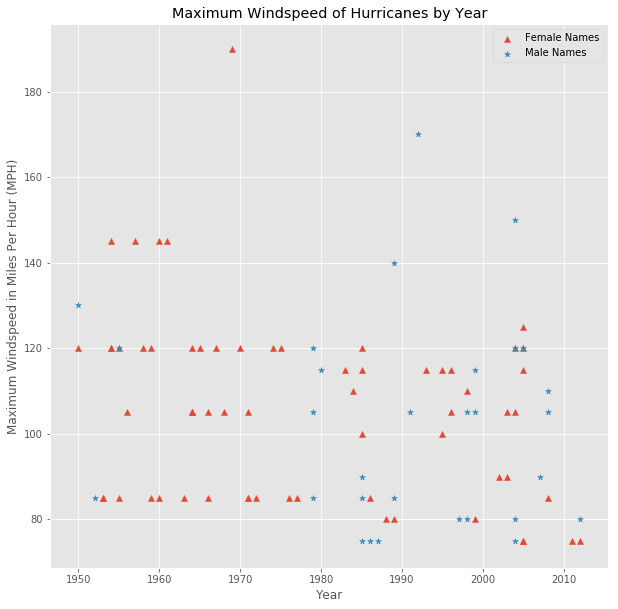

In [9]:
# Using a scatter plot to visualize data from the table above
# Separate into two data sets of male names and female
# Use boolean indexing to get the rest of the information
females = df['Gender'] == 'f'
males = df['Gender'] == 'm'
femaleInfo = df[females]
maleInfo = df[males]

plt.style.use(['ggplot'])
plt.figure(figsize=(10,10))
plot = plt.scatter(femaleInfo['Year'], femaleInfo['MaxWindspeed'], marker = "^" )
plt.scatter(maleInfo['Year'], maleInfo['MaxWindspeed'], marker = "*" )
plt.title('Maximum Windspeed of Hurricanes by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Windspeed in Miles Per Hour (MPH)')
plt.legend(['Female Names', 'Male Names'])

### Deadliest Hurricanes
Below is a table showing the 10 deadliest hurricanes by name as well as the year, and maximum windspeed they had.

In [10]:
# Indexing into the dataframe from a using boolean values.
df = df.drop(df.columns[[1]], axis=1)
topDeaths = df['Deaths'] > 56
deadliest = df[topDeaths]
deadliest = pd.pivot_table(deadliest,index=['Name', 'Gender'], values = ['Deaths'])
deadliest

,,Deaths
Name,Gender,
Agnes,f,117
Andrew,m,62
Audrey,f,416
Betsy,f,75
Camille,f,256
Carol,f,60
Diane,f,200
Ike,m,84
Katrina,f,1836


This graph shows the amount of deaths from the top 10 (Andrew and Rita both have the same amount of casualties), making it top 11 deadliest hurricanes. It's interesting to note that only two of the 11 hurricanes in this graph are male named. 

Text(0,0.5,'Name and Gender of Name')

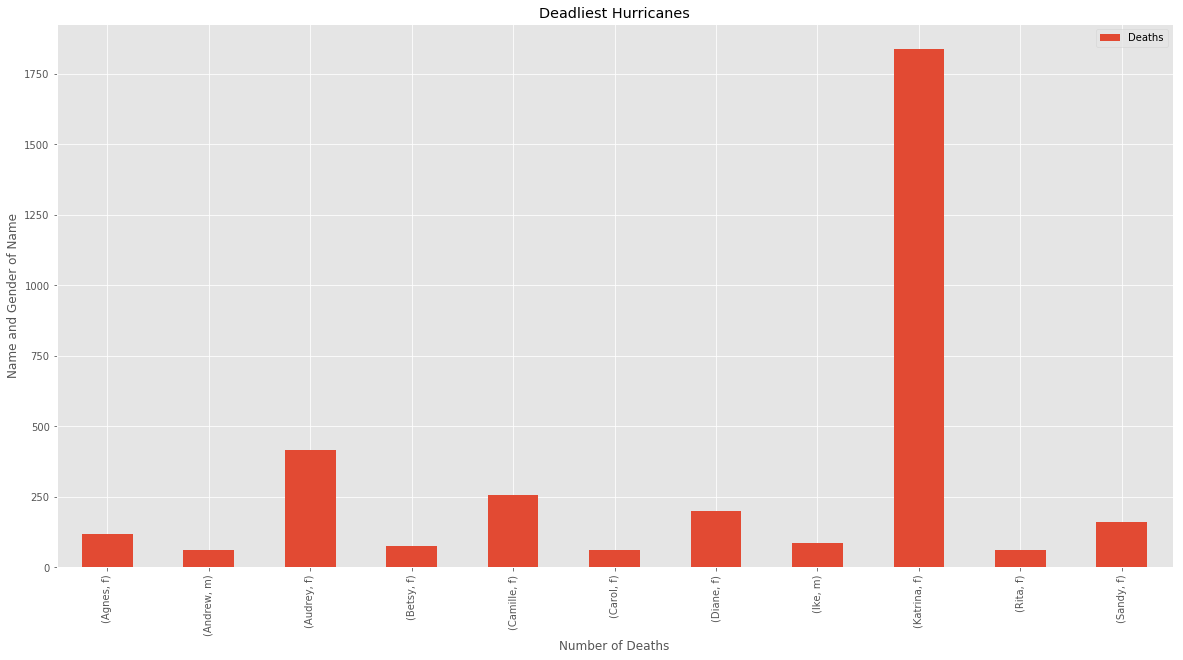

In [11]:
deadliest.plot.bar(figsize=(20,10))
plt.title('Deadliest Hurricanes')
plt.xlabel('Number of Deaths')
plt.ylabel('Name and Gender of Name')

## Conclusion
From all of the data visualization above, it is clear that female named hurricanes tend to be more deadly, but not more powerful. But it's important to remember that there are many more female named hurricanes than male, 68% of this dataset is female named hurricanes in comparison to 31% male. Due to this fact, it would be hard to see any correlation between genders of hurricane names and the amount of property damages. Although, there certainly seems to be a correlation between a higher death rate in female named hurricanes. 

Other discoveries include:
- That there are more female named hurricanes than male.
- Male named hurricanes tend to have higher windspeeds.

With these two discoveries it's interesting to note that there is no actual difference in hurricane windspeed or property damage based on the gender of the name. Only the deaths amongst female named hurricanes are higher than they should be from the ratio of male names. Therefore, it could be possible that people take female hurricanes less seriously than the threat of a male named hurricane. 

If you want to read more about why hurricanes are named, the history, or retired hurricane names the link is here: https://www.nhc.noaa.gov/aboutnames_history.shtml